# Decompose simulated data set

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [182]:
# Reading 2-month simulated sonar time series
import h5py
simy_path = '/media/wu-jung/wjlee_apl_2/ooi_zplsc_new/'
simu_fname = 'simulated_p1_p2_combine.h5'

f = h5py.File(os.path.join(simy_path,simu_fname),"r")

p1_alldays_3freq = np.array(f['p1_alldays_3freq'])
p2_alldays_3freq = np.array(f['p2_alldays_3freq'])
p1_p2_combine_3freq = np.array(f['p1_p2_combine_3freq'])

p1_alldays_3freq_dB = np.array(f['p1_alldays_3freq_dB'])
p2_alldays_3freq_dB = np.array(f['p2_alldays_3freq_dB'])
p1_p2_combine_3freq_dB = np.array(f['p1_p2_combine_3freq_dB'])

ping_time = np.array(f['ping_time'])
depth_bin_size = np.array(f['depth_bin_size'])
ping_per_day_mvbs = np.array(f['ping_per_day_mvbs'])

f.close()

In [42]:
day_num = 60

## Scikit-learn NMF

In [43]:
from sklearn import decomposition as decomp

In [44]:
sys.path.insert(0,'..')
import db_diff
import decomp_plot

In [67]:
from scipy.stats import norm

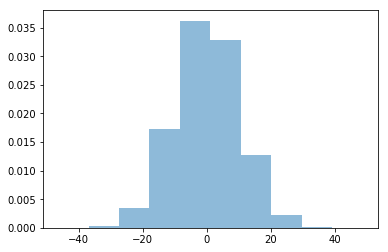

In [96]:
# Noise in MVBS
n = norm.rvs(size=mvbs.shape,loc=0,scale=10)

fig, ax = plt.subplots(1, 1)
ax.hist(n.reshape((-1,1)), normed=True, histtype='stepfilled', alpha=0.5)
ax.legend(loc='best', frameon=False)
plt.show()

In [160]:
# Linear domain decomposition
mvbs = p1_p2_combine_3freq_dB    # no noise
# mvbs = p1_p2_combine_3freq_dB+n  # add Gaussian noise
# mvbs[mvbs<0] = 0
mvbs_3freq = np.array([mvbs[ff,:,:].T.reshape((-1,ping_per_day_mvbs*mvbs.shape[1])) for ff in range(3)])
mvbs_long = mvbs_3freq.swapaxes(0,1).reshape((-1,ping_per_day_mvbs*mvbs.shape[1]*3))

In [161]:
p2_alldays_3freq.shape

(3, 37, 8640)

In [162]:
mvbs_3freq.shape

(3, 60, 5328)

In [183]:
mvbs_long.shape

(60, 15984)

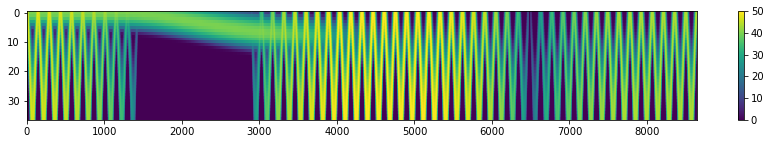

In [184]:
plt.figure(figsize=(15,2))
plt.imshow(mvbs[0,:,:],aspect='auto')
plt.colorbar()

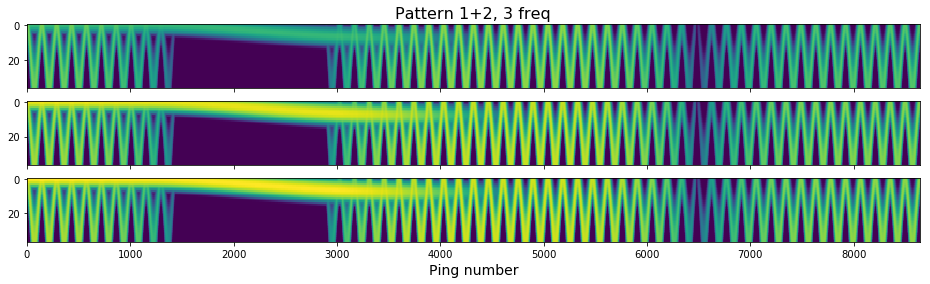

In [192]:
fig,ax = plt.subplots(3,1,figsize=(16,4),sharex=True)
ax[0].imshow(p1_p2_combine_3freq_dB[0,:,:],\
             aspect='auto',vmin=0,vmax=60)
ax[1].imshow(p1_p2_combine_3freq_dB[1,:,:],\
             aspect='auto',vmin=0,vmax=60)
ax[2].imshow(p1_p2_combine_3freq_dB[2,:,:],\
             aspect='auto',vmin=0,vmax=60)
ax[0].set_title('Pattern 1+2, 3 freq',fontsize=16)
ax[2].set_xlabel('Ping number',fontsize=14)
plt.show()

In [193]:
n_comp = 2
nmf_log = decomp.NMF(n_components=n_comp)#,solver='mu',beta_loss='itakura-saito')
W_log = nmf_log.fit_transform(mvbs_long)
H_log = nmf_log.components_
V_log = H_log.reshape((n_comp,3*ping_per_day_mvbs,-1)).swapaxes(1,2)

D_log = nmf_log.inverse_transform(W_log).copy()
D_log_sep,D_log_plot = decomp_plot.separate_transform_result(D_log,mvbs,ping_per_day_mvbs,log_opt=0)

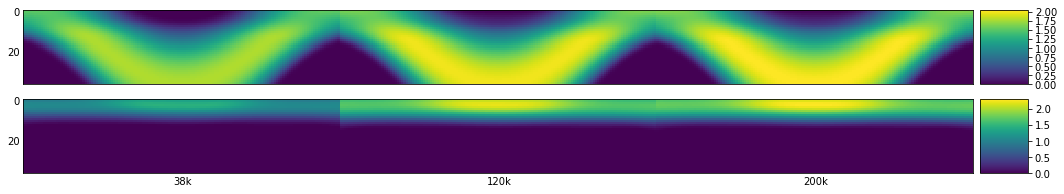

In [194]:
decomp_plot.plot_comp(V_log[:,::-1,:],n_comp,ping_per_day_mvbs,figsize_input=(18,3),log_opt=0)  # reverse vertical index (depth)

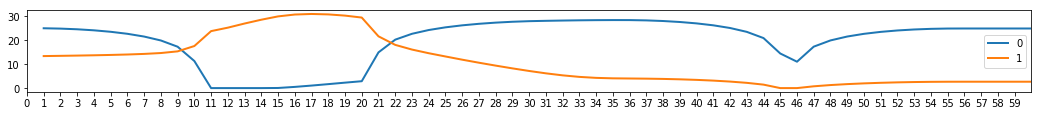

In [195]:
decomp_plot.plot_coef(W_log,n_comp,figsize_input=(18,1.5),log_opt=0)  # coef in linear scale

In [196]:
n_comp = 3
nmf_log = decomp.NMF(n_components=n_comp)#,solver='mu',beta_loss='itakura-saito')
W_log = nmf_log.fit_transform(mvbs_long)
H_log = nmf_log.components_
V_log = H_log.reshape((n_comp,3*ping_per_day_mvbs,-1)).swapaxes(1,2)

D_log = nmf_log.inverse_transform(W_log).copy()
D_log_sep,D_log_plot = decomp_plot.separate_transform_result(D_log,mvbs,ping_per_day_mvbs,log_opt=0)

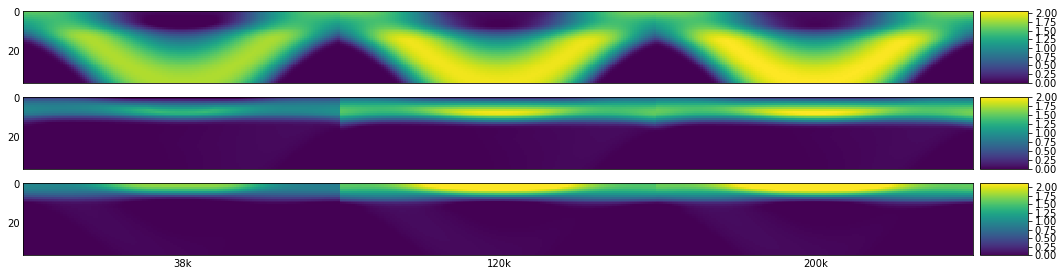

In [197]:
decomp_plot.plot_comp(V_log[:,::-1,:],n_comp,ping_per_day_mvbs,figsize_input=(18,4.5),log_opt=0)  # reverse vertical index (depth)

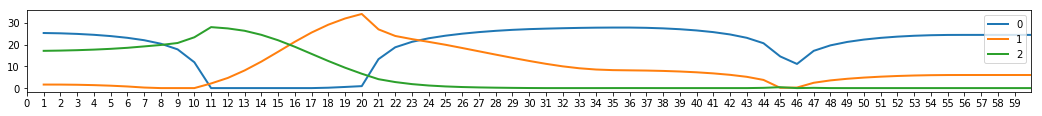

In [198]:
decomp_plot.plot_coef(W_log,n_comp,figsize_input=(18,1.5),log_opt=0)  # coef in linear scale